# Traditional AI

This notbook is focus on the theory and pratice of traditional ai. 

# AI

AI is the simulation of human intelligence processes by computer systems.

## AI Classification

<img src="images/ai-classification.png" heigth="300" width="400" />

### Supervised Learning

It's all about label data.

<img src="images/label-vs-unlabeled.png" heigth="300" width="400" />

Labels vs Features

**Features**: These are the independent variables or **inputs that you feed into your model**. They are the **characteristics of the data** that the model uses to learn and make predictions. For example, in a dataset of houses, the features might include the **number of bedrooms**, **the size** of the house in square feet, the **location**, etc.

**Labels**: These are the dependent variables or **outputs** that you want the **model to predict**. They are the **"answer"** or the **result that the model** is trained to predict. In the house dataset example, the label might be the price of the house.

### Supervised Learning - Use Cases

* Spam Detection: Spam vs Ham
* Image Recognition: Hotdog vs Not Hotdog
* Predict House Pricing, Predict Stock Prices: Regression
* Cusotomer Churn Prediction: Churn vs Not Churn
* Credit Scoring Prediction: Good vs Bad

### Supervised Learning - Algorithms

<img src="images/regression-vs-classification.png" heigth="300" width="400" />

* Regression
  * Linear Regression
  * Decision Trees
  * Random Forest
  * Gradient Boosting
  * Support Vector Machines
* Classification
  * Logistic Regression
  * Decision Trees
  * Random Forest
  * Gradient Boosting
  * Support Vector Machines
  * Naive Bayes

### Linear Regression (Regression)

Using Python Sklearn. 

Linear regression is a statistical method used to model the relationship between a dependent variable (y) and one or more independent variables (x)

/home/diego/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


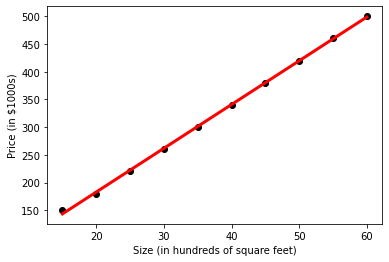

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

# House sizes in square feet (in hundreds)
sizes = np.array([15, 20, 25, 30, 35, 40, 45, 50, 55, 60]).reshape((-1, 1))

# Corresponding house prices in $1000s
prices = np.array([150, 180, 220, 260, 300, 340, 380, 420, 460, 500])

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(sizes, prices)

# Make predictions using the testing set
price_pred = regr.predict(sizes)

# Plot outputs
plt.scatter(sizes, prices,  color='black')
plt.plot(sizes, price_pred, color='red', linewidth=3)
plt.xlabel('Size (in hundreds of square feet)')
plt.ylabel('Price (in $1000s)')
plt.show()

Linear regression, the equation is usually written as:
```
y = b + mx + e
```
where:
```
b is the y-intercept of the regression line
m is the slope of the regression line
e is the error term (the difference between the actual and predicted values)
```

The slope m and y-intercept b are determined during the training process. The training process involves finding the values of m and b that minimize the sum of the squared error terms. This method is called the method of least squares.


### Logistic Regression (Classification)

Logistic regression is a statistical method used to model the relationship between a dependent variable (y) and one or more 
Independent variables (x) when the dependent variable is binary.
Binary values like 0/1, yes/no, true/false

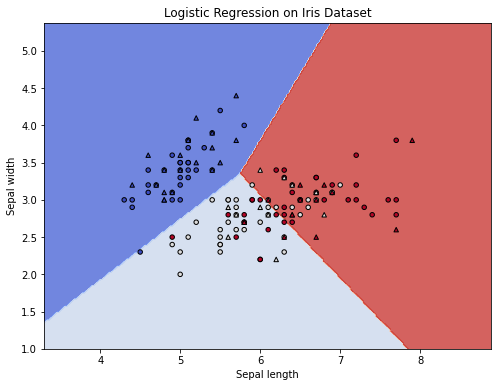

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # we only take the first two features for visualization
y = iris.target

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 70% training and 30% test

# Create Logistic Regression classifier
clf = LogisticRegression(max_iter=200)

# Train the model using the training sets
clf.fit(X_train, y_train)

# Create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the function value for the whole grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour and training examples
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k', marker='o')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k', marker='^')

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Logistic Regression on Iris Dataset')
plt.show()

#### About the dataset

**Iris** dataset, which is a multivariate dataset introduced by the British statistician and biologist Ronald Fisher in 1936. This dataset is freely available in the sklearn.datasets module and consists of *50 samples* from each of three species of Iris flowers (Iris setosa, Iris virginica, and Iris versicolor).

#### Linear Regression vs Logistic Regression

**Linear Regression**: This algorithm is used for **regression** problems, where the goal is to **predict a continuous output variable**. It **models the relationship between one or more independent variables (features)** and a continuous dependent variable (outcome). The relationship is modeled as a linear function, hence the name Linear Regression.

**Logistic Regression**: Despite its name, Logistic Regression is used for **classification** problems, where the goal is to **predict a categorical** output variable. It models the probability that a given input point belongs to a certain category. The **output** of logistic regression is **transformed with a logistic/sigmoid function** to ensure that the **output is between 0 and 1**, which can be interpreted as the **probability of the positive class**.

In [3]:
import numpy as np

## Sigmoid function - guarantees output between 0 and 1
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

print(f"Sigmoid 100 = {sigmoid(100)}")
print(f"Sigmoid 2 = {sigmoid(2)}")
print(f"Sigmoid 0 == {sigmoid(0)}")

Sigmoid 100 = 1.0
Sigmoid 2 = 0.8807970779778823
Sigmoid 0 == 0.5


#### Decision Trees

Decision Trees make the data be continuously split according to a certain parameter. It's used for both regression and classification problems.


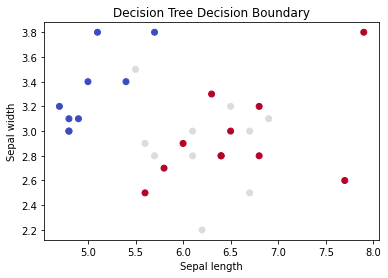

In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Load the dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features for visualization
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Plot the decision boundary
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Decision Tree Decision Boundary')
plt.show()

#### Random Forest

Random Forest is an ensemble learning method that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

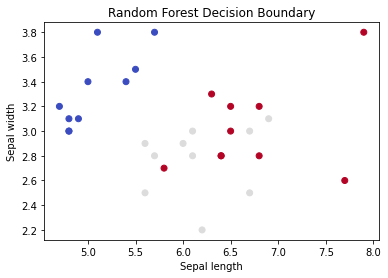

In [5]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Load the dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features for visualization
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Plot the decision boundary
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Random Forest Decision Boundary')
plt.show()

#### Gradient Boosting

Gradient boosting is a machine learning technique for regression and classification problems. It's a Ensemble method.

**Boosting**: Boosting is an ensemble technique where **new models are added to correct the errors made by existing models**. Models are added sequentially until no further improvements can be made.

**Gradient Boosting**: Gradient Boosting is an extension over boosting method. It uses the **gradient descent algorithm** which can **optimize** any differentiable **loss function**. An ensemble of weak prediction models. It generalizes them by allowing optimization of an arbitrary differentiable loss function.

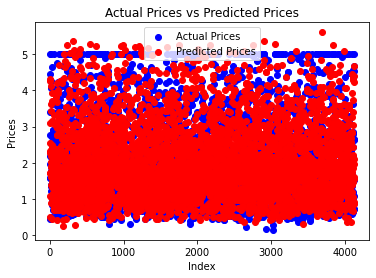

In [6]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
california = fetch_california_housing()
X = california.data
y = california.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=42)
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)

# Plot actual prices
plt.scatter(np.arange(len(y_test)), y_test, color='blue', label='Actual Prices')

# Plot predicted prices
plt.scatter(np.arange(len(y_pred)), y_pred, color='red', label='Predicted Prices')

plt.xlabel("Index")
plt.ylabel("Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.legend()
plt.show()

#### Support Vector Machines

**Support Vector Machines (SVM)** is used for both classification or regression. However, it is mostly used in classification problems. In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is the number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the **hyper-plane that differentiates the two classes**.



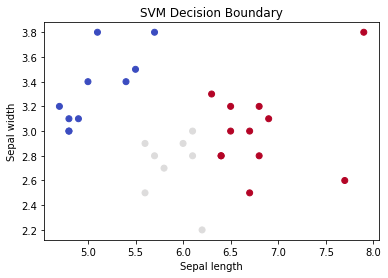

In [7]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
import matplotlib.pyplot as plt

# Load the dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features for visualization
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a SVM
clf = svm.SVC(kernel='linear', C=1.0, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Plot the decision boundary
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('SVM Decision Boundary')
plt.show()

#### Naive Bayes

Naive Bayes is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier **assumes** that the **presence of a particular feature in a class is unrelated to the presence of any other feature**.



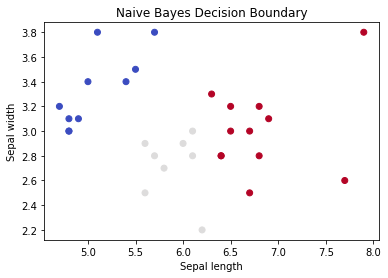

In [8]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

# Load the dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features for visualization
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Naive Bayes Classifier
clf = GaussianNB()
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Plot the decision boundary
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Naive Bayes Decision Boundary')
plt.show()

### Unsupervised Learning - Use Cases

* Clustering: Group customers by behavior for marketing.
* Anomaly Detection: Detecting finantial fraud.
* Dimensionality Reduction: Data Visualization, Speed up ML algorithms / noise reduction to improve performance.
* Feature Extraction: Used for image or text data to extract important features.
* Learning Representations: Used in Deep Learning to learn representations of data that can be used for other tasks such as classification or regression.
* Association Rule Learning: Used in Market Basket Analysis to find interesting relationships between items.

#### Unsupervised Learning - Clustering Algorithm

Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group and dissimilar to the data points in other groups.

<img src="images/clustering_vs_classifications.png" heigth="300" width="400" style="background-color: rgb(255,255,255);" />

Common clustering algorithms:

* K-Means
* Hierarchical Clustering
* DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
* Mean Shift
* Spectral Clustering
* Affinity Propagation
* Agglomerative Clustering
* BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies)

#### K-Means

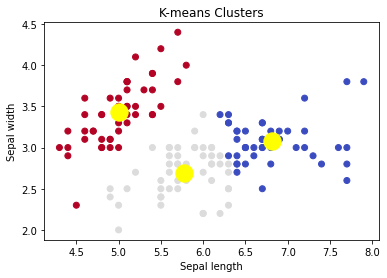

In [9]:
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features for visualization

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Make predictions
y_pred = kmeans.predict(X)

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=plt.cm.coolwarm)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('K-means Clusters')
plt.show()

K-means is Lazy Learning, it doesn't learn a discriminative function from the training data but memorizes the training dataset instead.

Trade-offs:
* K-means training is fast, but testing is slow.
* K-means is sensitive to the initialization of the centroids.
* K-means benefit is that it is easy to understand and implement.



#### Unsupervised Learning - Hierarchical Clustering Algorithm

Hierarchical clustering is a type of unsupervised machine learning algorithm used to cluster unlabeled data points. Like K-means clustering, hierarchical clustering also groups together the data points with similar characteristics. There are two types of hierarchical clustering: Agglomerative and Divisive.

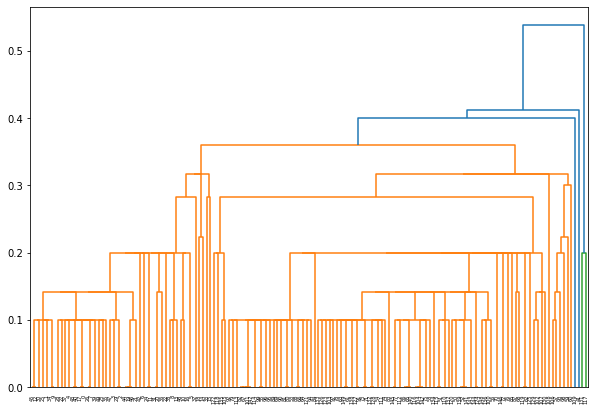

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features for visualization

# Perform Hierarchical Clustering
linked = linkage(X, 'single')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.show()

**linkage**: Hierarchical clustering is a type of clustering method that seeks to build a hierarchy of clusters. linkage function accomplishes this by following these steps:

1. Start by treating each data point as a single cluster.
2. Then, iteratively merge the two clusters that are closest to each other until only one cluster (or k clusters) remains.

**dendrogram** is a tree-like diagram that displays the sequence of merges or splits. It's a visual representation of the process of hierarchical clustering. The leaves of the dendrogram are the original observations, and each merge is represented by a horizontal line. The y-coordinate of the horizontal line is the distance between the two clusters that were merged, and observations are ordered such that leaves of the dendrogram that are close to each other are more similar to each other than to leaves that are further away.

Useful for:
* Visualize the process by which clusters are formed
* Determining the Number of Clusters
* Understanding Hierarchical Relationships (This can be useful in fields like biology)
* Exploratory Data Analysis (gain insights into the structure of your data)

#### Unsupervised Learning - DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular clustering algorithm used as an alternative to K-means. It doesn't require the number of clusters to be specified in advance and can identify clusters of arbitrary shapes.


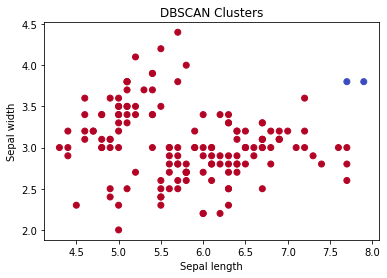

In [11]:
from sklearn import datasets
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Load the dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features for visualization

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)

# Make predictions
y_pred = dbscan.labels_

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('DBSCAN Clusters')
plt.show()

**DBSCAN** points that are not assigned to any cluster are considered as noise and are assigned the label -1.

#### Unsupervised Learning - Mean Shift Algorithm

Mean Shift is a clustering algorithm that assigns the data points to the clusters iteratively by shifting points towards the mode. The mode can be understood as the highest density of data points in the feature space.


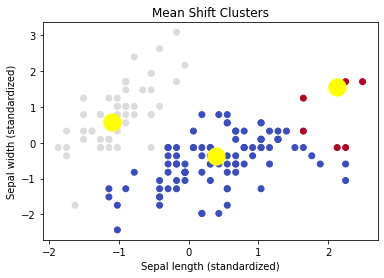

In [12]:
from sklearn import datasets
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features for visualization

# Standardize features to zero mean and unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform Mean Shift clustering
mean_shift = MeanShift(bandwidth=0.85)
mean_shift.fit(X_scaled)

# Make predictions
y_pred = mean_shift.labels_

# Plot the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred, cmap=plt.cm.coolwarm)
plt.scatter(mean_shift.cluster_centers_[:, 0], mean_shift.cluster_centers_[:, 1], s=300, c='yellow')
plt.xlabel('Sepal length (standardized)')
plt.ylabel('Sepal width (standardized)')
plt.title('Mean Shift Clusters')
plt.show()

 **Mean Shift** It's a centroid-based algorithm, meaning that the goal is to locate the center points of each group/class, which works by updating candidates for centroids to be the mean of the points within a given region. These candidates are then filtered in a post-processing stage to eliminate near-duplicates, forming the final set of centroids and hence cluster centers.

 The **bandwidth** parameter in the MeanShift function is a user-defined parameter that dictates the size of the region/window to consider around each point.

#### Unsupervised Learning - Spectral Clustering Algorithm

Spectral clustering is a clustering technique based on the eigenvalues of a similarity matrix. It's used for clustering non-convex clusters.

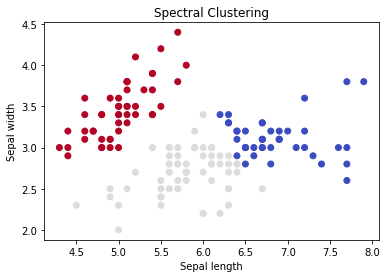

In [13]:
from sklearn import datasets
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt

# Load the dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features for visualization

# Perform Spectral Clustering
spectral_clustering = SpectralClustering(n_clusters=3, affinity='nearest_neighbors')
spectral_clustering.fit(X)

# Make predictions
y_pred = spectral_clustering.labels_

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Spectral Clustering')
plt.show()

**Spectral Clustering** is a technique that applies clustering to the data after transforming it into a different space, often making complex cluster structures more separable. It's particularly useful when the structure of individual clusters is complex and a centroid-based clustering like k-means would not be effective.

Works as follows:
1. Similarity Matrix: Matrix captures the notion of similarity between each pair of points. Usually using Gaussian kernel.
2. Graph Representation: Matrix is then transformed into a graph. Similarity between two points is represented by the weight of the edge connecting them.
3. Laplacian Matrix: compute the Laplacian of the graph
4. Eigenvalue Decomposition: decomposed into its eigenvalues and eigenvectors.
5. Clustering: a standard clustering algorithm (like k-means)

#### Unsupervised Learning - Affinity Propagation Algorithm

Affinity Propagation is a clustering algorithm based on the concept of "message passing" between data points. It does not require the number of clusters to be determined before running the algorithm.

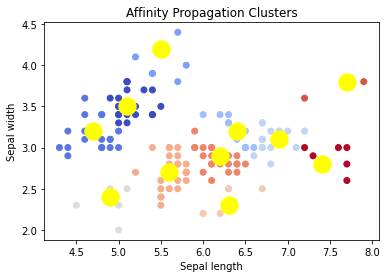

In [14]:
from sklearn import datasets
from sklearn.cluster import AffinityPropagation
import matplotlib.pyplot as plt

# Load the dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features for visualization

# Perform Affinity Propagation clustering
affinity_propagation = AffinityPropagation(random_state=5)
affinity_propagation.fit(X)

# Make predictions
y_pred = affinity_propagation.labels_

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=plt.cm.coolwarm)
plt.scatter(affinity_propagation.cluster_centers_[:, 0], affinity_propagation.cluster_centers_[:, 1], s=300, c='yellow')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Affinity Propagation Clusters')
plt.show()

**Affinity Propagation** identifies a set of exemplars for data points, which can be thought of as the most representative examples of each cluster. Unlike other clustering methods like K-means, it does not require the number of clusters to be determined or estimated before running the algorithm.

Works as follows steps:
1. Similarity Matrix: Compute the similarity between all pairs of data points.
2. Responsibility: Update the responsibility matrix, which quantifies how well-suited one data point is to be the exemplar of another.
3. Availability: Update the availability matrix, which quantifies how well-suited a data point is to choose another as its exemplar.
4. Message Passing: Update the responsibility and availability matrices iteratively.
5. Exemplar Identification: Identify exemplars based on the responsibility and availability matrices.


#### Unsupervised Learning - Agglomerative Clustering Algorithm

Agglomerative clustering is a type of hierarchical clustering that builds a hierarchy of clusters. It begins with each data point as a single cluster and merges the closest pairs of clusters until only one cluster remains.

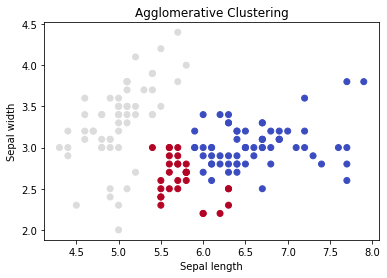

In [15]:
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Load the dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features for visualization

# Perform Agglomerative Clustering
agglomerative_clustering = AgglomerativeClustering(n_clusters=3)
agglomerative_clustering.fit(X)

# Make predictions
y_pred = agglomerative_clustering.labels_

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Agglomerative Clustering')
plt.show()

**Agglomerative Clustering** is a type of hierarchical clustering method that builds a hierarchy of clusters by merging together small clusters. 

It's a "bottom-up" approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.

Works as follows steps:
1. Initialization: Start by assigning each data point to its own cluster.
2. Find Closest Clusters: Compute the distance between all pairs of clusters and merge the two clusters that are closest to each other.
3. Merge Clusters: Update the distance matrix to reflect the new distances between the clusters.
4. Update Distance Matrix: After merging, recompute the distances between the new cluster and each of the old clusters.
5. Repeat: Repeat steps 2-4 until only a single cluster remains.
6. Results: The result is a tree-based representation of the data called a dendrogram, which shows the order in which clusters were merged.

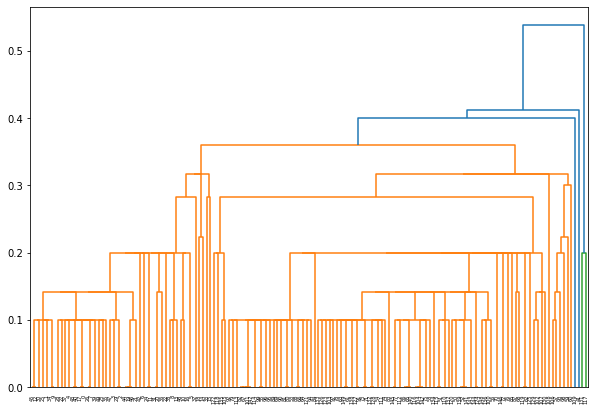

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')

plt.figure(figsize=(10, 7))
dendrogram(linked,  
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

#### Unsupervised Learning - BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies) Algorithm

BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies) is a clustering algorithm that is designed to handle large datasets by incrementally and dynamically clustering incoming data points.

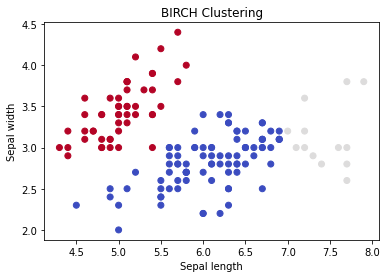

In [17]:
from sklearn import datasets
from sklearn.cluster import Birch
import matplotlib.pyplot as plt

# Load the dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features for visualization

# Perform BIRCH clustering
birch = Birch(n_clusters=3)
birch.fit(X)

# Make predictions
y_pred = birch.labels_

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('BIRCH Clustering')
plt.show()

**BIRCH** is a clustering algorithm that is particularly suited for large datasets.

Works as follows steps:
1. Build Clustering Feature Tree (CF Tree): Construct a tree structure to represent the data points.
2. Insert Data Points: Insert new data points into the CF Tree.
3. Update the CF Tree: Update the tree structure to reflect the new data points.
4. Global Clustering: Perform global clustering on the data points in the CF Tree.

#### Unsupervised Learning - Dimentionality Reduction Algorithms

<img src="images/dimensionality_reduction.jpeg" heigth="300" width="400" />

Dimensionality Reduction is a technique used in machine learning and data analysis to reduce the number of input variables in a dataset. It's particularly useful when dealing with high-dimensional data, where each data point has a large number of features.

Commonly used algorithms for dimensionality reduction include:
* Principal Component Analysis (PCA)
* Linear Discriminant Analysis (LDA)
* Generalized Discriminant Analysis (GDA)
* t-Distributed Stochastic Neighbor Embedding (t-SNE)
* Independent Component Analysis (ICA)
* Non-negative Matrix Factorization (NMF)
* Uniform Manifold Approximation and Projection (UMAP)
* Autoencoders

#### Unsupervised Learning - Anomaly Detection Algorithms

Anomaly detection is a technique used to identify unusual patterns that do not conform to expected behavior, called outliers. It has many applications in business, from intrusion detection (identifying strange patterns in network traffic that could signal a hack) to system health monitoring (spotting a malignant tumor in an MRI scan), and from fraud detection in credit card transactions to fault detection in operating environments.

Commonly used algorithms for anomaly detection include:

* Simple Statistical Methods
* Z-Score or Standard Score
* DBSCAN
* Isolation Forest
* Autoencoders
* Support Vector Machine-Based Approaches
* Local Outlier Factor (LOF)


#### Unsupervised Learning - Feature Extraction Algorithms

Feature extraction is a technique used to reduce the number of input variables in a dataset by creating new features that capture the essential information in the original features. It's particularly useful when dealing with high-dimensional data, where each data point has a large number of features.

Commonly used algorithms for feature extraction include:
* Principal Component Analysis (PCA)
* Linear Discriminant Analysis (LDA)
* Independent Component Analysis (ICA)
* Non-negative Matrix Factorization (NMF)
* Autoencoders
* t-Distributed Stochastic Neighbor Embedding (t-SNE)
* Uniform Manifold Approximation and Projection (UMAP)




#### Unsupervised Learning - Learning Representations  Algorithms

Learning representations is a technique used in deep learning to learn a set of features or representations of the data that can be used for other tasks such as classification or regression. It's particularly useful when dealing with high-dimensional data, where each data point has a large number of features.

Commonly used algorithms for learning representations include:
* Autoencoders
* Restricted Boltzmann Machines (RBMs)
* Deep Belief Networks (DBNs)
* t-Distributed Stochastic Neighbor Embedding (t-SNE)
* Word2Vec
* GloVe (Global Vectors for Word Representation)
* BERT (Bidirectional Encoder Representations from Transformers)


#### Unsupervised Learning - Association Rule Learning  Algorithms

Association rule learning is a technique used to discover interesting relationships between variables in large databases. It's particularly useful in market basket analysis, where the goal is to find associations between items that are frequently purchased together.

Commonly used algorithms for association rule learning include:
* Apriori Algorithm (classic data mining)
* Eclat Algorithm (Eclat algorithm is a DFS-based approach)
* FP-Growth Algorithm 
* GRI (Generalized Rule Induction)
* OPUS-R (Ordered Prism Unbiased Selector-R)